In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dt = load_iris().data

In [ ]:
# Column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
# Create the DataFrame
df = pd.DataFrame(data,columns=names)

In [ ]:
# View the DataFrame
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Now build Histogram for every column/Feature

<Figure size 720x720 with 0 Axes>

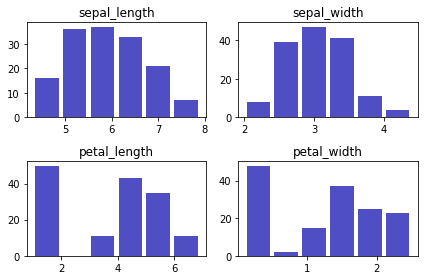

In [ ]:
plt.figure(figsize=[10,10])
f,a = plt.subplots(2,2)
a = a.ravel()

# density=True - normalize the histogram
for idx,ax in enumerate(a):
    counts, bins, patches = ax.hist(df.iloc[:,idx], bins=6, color='#0504aa', alpha=0.7, rwidth=0.85)
    ax.set_title(dataset.columns[idx])
plt.tight_layout()

Histograms are normalized to [0,1] for each single feature.  
And respective counts of each bin and Bin size of each plot is printed in the same sequence of that column_name respectively.  

Note- Bin size is randomly choosen. 

Count  [0.17777778 0.4        0.41111111 0.36666667 0.23333333 0.07777778] -Bin  [4.3 4.9 5.5 6.1 6.7 7.3 7.9]


Count  [0.13333333 0.65       0.78333333 0.68333333 0.18333333 0.06666667] -Bin  [2.  2.4 2.8 3.2 3.6 4.  4.4]


Count  [0.33898305 0.         0.07457627 0.29152542 0.23728814 0.07457627] -Bin  [1.         1.98333333 2.96666667 3.95       4.93333333 5.91666667
 6.9       ]


Count  [0.8        0.03333333 0.25       0.61666667 0.41666667 0.38333333] -Bin  [0.1 0.5 0.9 1.3 1.7 2.1 2.5]




<Figure size 720x720 with 0 Axes>

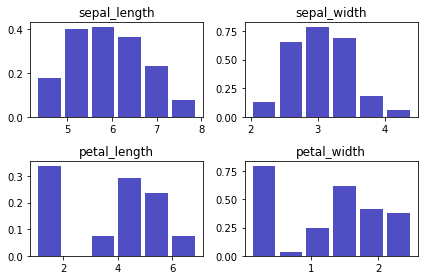

In [ ]:
plt.figure(figsize=[10,10])
f,a = plt.subplots(2,2)
a = a.ravel()

count = []
binning = []
# density=True - normalize the histogram
for idx,ax in enumerate(a):
    counts, bins, patches = ax.hist(df.iloc[:,idx], bins=6,density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
    count.append(counts)
    binning.append(bins)
    print('Count ',counts,'-Bin ',bins)
    print('\n')
    ax.set_title(dataset.columns[idx])
plt.tight_layout()

# Algorithm Implementation

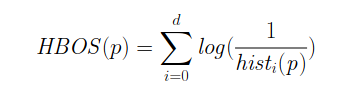

Image-Source:https://www.dfki.de/fileadmin/user_upload/import/6431_HBOS-poster.pdf

Store dataframe into another dataframe so that if want to revert back all changes, then can load up the original dataframe(df) directly.  

Now on all changes will be on this new dataframe- a.

## Steps:  
## First --- image.png
  
## Second --- 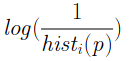
  
## Third --- 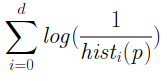
  
## Fourth --- BoxPlot

### First,

image.png



In [ ]:
# Initialize the new dataframe
a = pd.DataFrame()

In [ ]:
# Now each column is divided into bin size of 6 using pandas.cut() function.
    # First detemine the bin each value belongs to.
    # After determining bin range of each value we replace the value of the sample with the count/frequency of the bin it belongs.
    
a['s_l'] = pd.cut(x = df['sepal_length'], bins=6, labels=count[0], include_lowest=True, ordered=False)
a['s_w'] =  pd.cut(x = df['sepal_width'], bins=6, labels=count[1], include_lowest=True, ordered=False)
a['p_l'] = pd.cut(x = df['petal_length'], bins=6, labels=count[2], include_lowest=True, ordered=False)
a['p_w'] =  pd.cut(x = df['petal_width'], bins=6, labels=count[3], include_lowest=True, ordered=False)

In [ ]:
# Print the DataFrmame after replacing each value with its corresponding bin frequency.
a

,s_l,s_w,p_l,p_w
0,0.400000,0.683333,0.338983,0.800000
1,0.177778,0.783333,0.338983,0.800000
2,0.177778,0.783333,0.338983,0.800000
3,0.177778,0.783333,0.338983,0.800000
4,0.400000,0.683333,0.338983,0.800000
...,...,...,...,...
145,0.366667,0.783333,0.237288,0.383333
146,0.366667,0.650000,0.237288,0.416667
147,0.366667,0.783333,0.237288,0.416667
148,0.366667,0.683333,0.237288,0.383333


In [ ]:
# Checking column name and thier respective datatype
a.columns

Index(['s_l', 's_w', 'p_l', 'p_w'], dtype='object')

In [ ]:
# Change datatype of each column to float to easily implemet the mathematical operations.
a = a.astype(float)

In [ ]:
# Divide each value/column with Sum of frequencies of all the bins of that particular feature.
# As Count list contains nested lists who have bin frequency for each respective bin for all respective features.
# Count[0] belongs to first column and so on.

a['s_l'] = a['s_l'].div(sum(count[0]))
a['s_w'] = a['s_w'].div(sum(count[1]))
a['p_l'] = a['p_l'].div(sum(count[2]))
a['p_w'] = a['p_w'].div(sum(count[3]))

In [ ]:
a

,s_l,s_w,p_l,p_w
0,0.240000,0.273333,0.333333,0.320000
1,0.106667,0.313333,0.333333,0.320000
2,0.106667,0.313333,0.333333,0.320000
3,0.106667,0.313333,0.333333,0.320000
4,0.240000,0.273333,0.333333,0.320000
...,...,...,...,...
145,0.220000,0.313333,0.233333,0.153333
146,0.220000,0.260000,0.233333,0.166667
147,0.220000,0.313333,0.233333,0.166667
148,0.220000,0.273333,0.233333,0.153333


### Second, 

 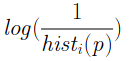

In [ ]:
a = np.log10(1/a)

In [ ]:
a

,s_l,s_w,p_l,p_w
0,0.619789,0.563307,0.477121,0.494850
1,0.971971,0.503993,0.477121,0.494850
2,0.971971,0.503993,0.477121,0.494850
3,0.971971,0.503993,0.477121,0.494850
4,0.619789,0.563307,0.477121,0.494850
...,...,...,...,...
145,0.657577,0.503993,0.632023,0.814363
146,0.657577,0.585027,0.632023,0.778151
147,0.657577,0.503993,0.632023,0.778151
148,0.657577,0.563307,0.632023,0.814363


### Third,
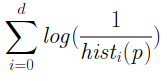

In [ ]:
# Sum of each row
# Add that result to new column say-answer
a['answer'] = a.sum(axis=1)

In [ ]:
a

,s_l,s_w,p_l,p_w,answer
0,0.619789,0.563307,0.477121,0.494850,2.155067
1,0.971971,0.503993,0.477121,0.494850,2.447936
2,0.971971,0.503993,0.477121,0.494850,2.447936
3,0.971971,0.503993,0.477121,0.494850,2.447936
4,0.619789,0.563307,0.477121,0.494850,2.155067
...,...,...,...,...,...
145,0.657577,0.503993,0.632023,0.814363,2.607957
146,0.657577,0.585027,0.632023,0.778151,2.652778
147,0.657577,0.503993,0.632023,0.778151,2.571745
148,0.657577,0.563307,0.632023,0.814363,2.667271


### Fourth,
to find the outliers - visualize the last column that contains HBOS value via box plot

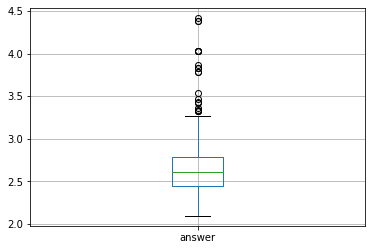

In [ ]:
a.boxplot(column=['answer'])